In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from KNN import KNearest

In [2]:
female_dataset = pd.read_csv('ANSUR II FEMALE Public.csv')


female_dataset

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,29501,285,1392,335,223,1297,252,196,368,299,...,Combat Support,42A,Texas,3,Mexican,3,51,67,180,Right hand
1982,29502,262,1324,301,202,1204,236,181,378,294,...,Combat Support,25U,Texas,3,Mexican,3,40,63,150,Right hand
1983,29503,260,1334,318,213,1259,234,183,363,332,...,Combat Support,42A,Texas,2,NaN,2,40,66,168,Right hand
1984,29511,205,1293,302,199,1207,213,163,376,276,...,Combat Support,92Y,Texas,3,Mexican,3,31,63,133,Right hand


In [3]:
male_dataset = pd.read_csv('ANSUR II MALE Public.csv',encoding="Latin-1")

male_dataset

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,29442,235,1353,312,216,1263,228,193,384,318,...,Combat Arms,11B,Colorado,51,Blackfoot Cherokee Choctaw,1,22,67,160,Right hand
4078,29443,247,1473,336,234,1346,253,196,428,374,...,Combat Arms,91B,Oklahoma,1,NaN,1,22,71,194,Right hand
4079,29447,264,1394,313,227,1280,245,193,407,367,...,Combat Arms,13B,Oklahoma,1,NaN,1,23,67,186,Right hand
4080,29451,203,1417,327,223,1314,250,196,419,365,...,Combat Arms,13P,Oklahoma,1,NaN,1,22,69,165,Right hand


In [4]:
data = pd.concat([female_dataset,male_dataset]).reset_index()

data['weightkg'] = data['weightkg'] / 10

data['stature'] = data['stature'] / 10

data['Gender'] = data['Gender'].replace(['Female','Male'],[0,1])




data


,index,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,subjectid
0,0,10037.0,231,1282,301,204,1180,222,177,373,...,92Y,Germany,2,NaN,2,26,61,142,Right hand,NaN
1,1,10038.0,194,1379,320,207,1292,225,178,372,...,25U,California,3,Mexican,3,21,64,120,Right hand,NaN
2,2,10042.0,183,1369,329,233,1271,237,196,397,...,35D,Texas,1,NaN,1,23,68,147,Right hand,NaN
3,3,10043.0,261,1356,306,214,1250,240,188,384,...,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand,NaN
4,4,10051.0,309,1303,308,214,1210,217,182,378,...,42A,Texas,1,NaN,1,45,63,195,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,4077,NaN,235,1353,312,216,1263,228,193,384,...,11B,Colorado,51,Blackfoot Cherokee Choctaw,1,22,67,160,Right hand,29442.0
6064,4078,NaN,247,1473,336,234,1346,253,196,428,...,91B,Oklahoma,1,NaN,1,22,71,194,Right hand,29443.0
6065,4079,NaN,264,1394,313,227,1280,245,193,407,...,13B,Oklahoma,1,NaN,1,23,67,186,Right hand,29447.0
6066,4080,NaN,203,1417,327,223,1314,250,196,419,...,13P,Oklahoma,1,NaN,1,22,69,165,Right hand,29451.0


In [5]:
df1 = data.query('Gender == 0')['stature']
df2 = data.query('Gender == 1')['stature']

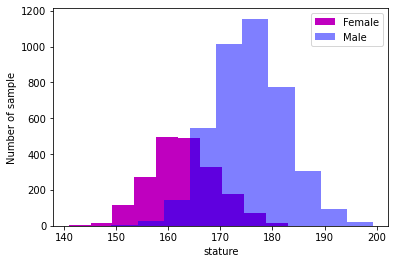

In [6]:
plt.hist(df1,color='m')
plt.hist(df2,color='b',alpha=0.5)
plt.xlabel("stature")
plt.ylabel("Number of sample")
plt.legend(['Female','Male'])

plt.show()

In [10]:
X  = data[["stature" , "weightkg"]] 
X = np.array(X)
X

array([[156. ,  65.7],
       [166.5,  53.4],
       [171.1,  66.3],
       ...,
       [169. ,  83.2],
       [171.8,  73.1],
       [182.8,  98.5]])

In [11]:
Y = np.array(data['Gender'])
Y.shape

(6068,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=300, test_size = .2)


K=3

In [13]:
knn = KNearest(3)
knn.fit(X_train,y_train)

In [14]:
Y_pred = knn.predict(X_test)


In [15]:
knn.evaluate(X_test,y_test)

0.8039538714991763

K=5

In [16]:
knn = KNearest(5)
knn.fit(X_train,y_train)

In [17]:
Y_pred = knn.predict(X_test)


In [18]:
knn.evaluate(X_test,y_test)

0.8220757825370676

Confusion Matrix

In [19]:
conf_mat = np.zeros((2,2))
for i in range(X_test.shape[0]):
    y_pred = knn.predict(X_test[i])
    if y_test[i] == 0 and y_pred == 0:
        conf_mat[0,0] += 1
    elif  y_test[i] == 0 and y_pred == 1:
        conf_mat[0,1] += 1
    elif y_test[i] == 1 and y_pred == 0:
        conf_mat[1,0] += 1
    elif y_test[i] == 1 and y_pred == 1:
        conf_mat[1,1] += 1
        
conf_mat

array([[288., 123.],
       [ 93., 710.]])

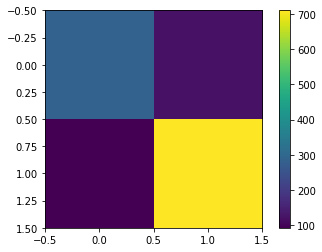

In [22]:
plt.imshow(conf_mat)
plt.colorbar()

K=7

In [23]:
knn = KNearest(5)
knn.fit(X_train,y_train)

In [24]:
Y_pred = knn.predict(X_test)


In [25]:
knn.evaluate(X_test,y_test)

0.8220757825370676

In [21]:
classifer = KNeighborsClassifier(n_neighbors=7)

classifer.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
classifer.score(X_test,y_test)

0.8525535420098846

In [ ]:
y_pred= classifer.predict(X_test)


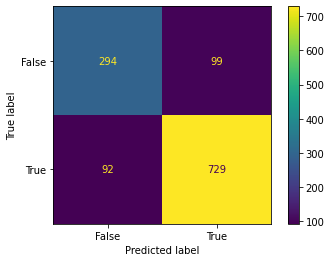

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()


K=7